In [16]:
import pandas
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib inline
# notebook

In [17]:
# Replace this variable accordingly 
path_to_results = "../../experiments/BiVar/2018-11-10-17-52_BiVarPower_/"

In [18]:
data = pandas.read_csv(path_to_results + "BiVarPower.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [19]:
from IPython.display import display
pandas.options.display.max_columns = None

In [20]:
data.head(17) # Surfing lot of 0, 2nd Line somehow got here 

,refId,nDim,noise,n,nRep,testId,alpha,M,powerAt90,powerAt95,powerAt99,thresholdAt90,thresholdAt95,thresholdAt99,avgContrast,stdContrast,avgWalltime,stdWalltime,avgCPUtime,stdCPUtime,avgPrepWalltime,stdPrepWalltime,avgPrepCPUtime,stdPrepCPUtime,category
0,0-Hypothesis,2,0,1000,500,Slope Inversion,NaN,NaN,0.1,0.05,0.01,0.06451327341878214,0.06663769851012415,0.06895377392035554,0.059949586085988,0.0035113429344349853,1.751357502000003,34.350881878657276,0.13876257200000003,0.16171603290686762,0.20332348200000006,1.5467021204378482,0.06682573600000008,0.040403742339892745,0
1,refId,nDim,noise,n,nRep,testId,alpha,M,powerAt90,powerAt95,powerAt99,thresholdAt90,thresholdAt95,thresholdAt99,avgContrast,stdContrast,avgWalltime,stdWalltime,avgCPUtime,stdCPUtime,avgPrepWalltime,stdPrepWalltime,avgPrepCPUtime,stdPrepCPUtime,refId
2,0-Hypothesis,2,0,1000,500,Mutual Information,NaN,NaN,0.1,0.05,0.01,0.1673505018180362,0.16885723987422718,0.17249027096517017,0.15992195166242154,0.00527825365966345,1.7063168799999973,32.95403900692966,0.16265542799999982,0.16636343518055563,0.16687045000000003,1.3286729143245632,0.06851856599999998,0.04593114112123761,0
3,0-Hypothesis,2,0,1000,500,Slope,NaN,NaN,0.1,0.05,0.01,0.06296500080236449,0.06448701321459833,0.06835067305802474,0.05708249478351352,0.0043838272296705776,1.7391754480000015,34.74581268963705,0.13492320999999996,0.14952410762111135,0.33033116399999984,3.303642012442531,0.07278560400000005,0.07091148383814458,0
4,0-Hypothesis,2,0,1000,500,Distance Correlation,NaN,NaN,0.1,0.05,0.01,0.05371302719736752,0.06234399608054359,0.08156132264012467,-4.263989567788451E-4,0.03184169801968591,1.7061100380000003,32.98163831847622,0.14555121,0.49098475386052143,0.35730112799999986,4.5023197038361635,0.09006855199999997,0.47698735528162606,0
5,0-Hypothesis,2,0,1000,500,Kendalls Tau,NaN,NaN,0.1,0.05,0.01,0.0344828828828829,0.04287527527527526,0.06067843843843846,0.001115395395395395,0.021545138124792036,1.4743745300000002,6.173628334796807,1.1969017479999993,1.1456313684856179,0.15655752000000012,0.9561782971598091,0.06628387000000004,0.03593254207128282,0
6,0-Hypothesis,2,0,1000,500,Correlation,NaN,NaN,0.1,0.05,0.01,0.05069351118198447,0.06352145225961905,0.07960572792793376,-4.199453379392445E-4,0.032019153328618495,1.4796227400000002,29.023834964765427,0.1353949459999999,0.1673073454973625,0.42679675799999955,5.301358556373876,0.08338532800000013,0.09371864523094779,0
7,0-Hypothesis,2,0,1000,500,Jensen Shannon Equity Width,NaN,NaN,0.1,0.05,0.01,0.27369302425860875,0.2777952906996329,0.2816891296793138,0.2634268807475158,0.007769393024156409,1.9462356180000004,36.018757812832554,1.5913309539999982,28.85133341415513,0.15799176399999973,1.4463334921119821,0.06690739000000001,0.053242427873921375,0
8,0-Hypothesis,2,0,1000,500,Spearman Correlation,NaN,NaN,0.1,0.05,0.01,0.0521006225006226,0.06336484356484363,0.08648360948360967,1.7252138852138824E-4,0.03253433609594084,2.1236535719999994,32.86263265863706,0.5752482860000001,0.5056886389557809,0.30332848999999973,3.92719219260379,0.06619726600000002,0.06499928508855536,0
9,0-Hypothesis,2,0,1000,500,MCE,NaN,NaN,0.1,0.05,0.01,0.005744046445268026,0.006612146805828467,0.008405357650995706,0.0036352610927987026,0.0016247700284996115,2.476690395999999,38.536101629970666,0.7338150380000006,0.7631195854852862,0.2703666000000001,3.056948221856892,0.061496269999999964,0.025864757363564268,0


In [21]:
print(data.shape)
data = data[data["refId"] != "refId"]
print(data.shape)

(6465, 25)
(6464, 25)


In [22]:
data.head()

,refId,nDim,noise,n,nRep,testId,alpha,M,powerAt90,powerAt95,powerAt99,thresholdAt90,thresholdAt95,thresholdAt99,avgContrast,stdContrast,avgWalltime,stdWalltime,avgCPUtime,stdCPUtime,avgPrepWalltime,stdPrepWalltime,avgPrepCPUtime,stdPrepCPUtime,category
0,0-Hypothesis,2,0,1000,500,Slope Inversion,NaN,NaN,0.1,0.05,0.01,0.06451327341878214,0.06663769851012415,0.06895377392035554,0.059949586085988,0.0035113429344349853,1.751357502000003,34.350881878657276,0.13876257200000003,0.16171603290686762,0.20332348200000006,1.5467021204378482,0.06682573600000008,0.040403742339892745,0
2,0-Hypothesis,2,0,1000,500,Mutual Information,NaN,NaN,0.1,0.05,0.01,0.1673505018180362,0.16885723987422718,0.17249027096517017,0.15992195166242154,0.00527825365966345,1.7063168799999973,32.95403900692966,0.16265542799999982,0.16636343518055563,0.16687045000000003,1.3286729143245632,0.06851856599999998,0.04593114112123761,0
3,0-Hypothesis,2,0,1000,500,Slope,NaN,NaN,0.1,0.05,0.01,0.06296500080236449,0.06448701321459833,0.06835067305802474,0.05708249478351352,0.0043838272296705776,1.7391754480000015,34.74581268963705,0.13492320999999996,0.14952410762111135,0.33033116399999984,3.303642012442531,0.07278560400000005,0.07091148383814458,0
4,0-Hypothesis,2,0,1000,500,Distance Correlation,NaN,NaN,0.1,0.05,0.01,0.05371302719736752,0.06234399608054359,0.08156132264012467,-4.263989567788451E-4,0.03184169801968591,1.7061100380000003,32.98163831847622,0.14555121,0.49098475386052143,0.35730112799999986,4.5023197038361635,0.09006855199999997,0.47698735528162606,0
5,0-Hypothesis,2,0,1000,500,Kendalls Tau,NaN,NaN,0.1,0.05,0.01,0.0344828828828829,0.04287527527527526,0.06067843843843846,0.001115395395395395,0.021545138124792036,1.4743745300000002,6.173628334796807,1.1969017479999993,1.1456313684856179,0.15655752000000012,0.9561782971598091,0.06628387000000004,0.03593254207128282,0


In [23]:
data2 = pandas.read_csv("../../experiments/2018-09-27-16-50_Power_/Power.csv")

In [24]:
data2.head()

,refId,nDim,noise,n,nRep,testId,alpha,M,powerAt90,powerAt95,powerAt99,thresholdAt90,thresholdAt95,thresholdAt99,avgContrast,stdContrast,avgWalltime,stdWalltime,avgCPUtime,stdCPUtime,avgPrepWalltime,stdPrepWalltime,avgPrepCPUtime,stdPrepCPUtime
0,0-Hypothesis,2,0.0,1000,500,MS,NaN,NaN,0.1,0.05,0.01,0.052620,0.063094,0.077340,0.000096,0.031004,1.256884,7.240467,0.794930,0.872338,0.095931,0.328459,0.075013,0.038937
1,0-Hypothesis,2,0.0,1000,500,MWP,0.5,50.0,0.1,0.05,0.01,0.597784,0.631459,0.675596,0.501265,0.073985,0.779002,1.766989,0.728564,1.243621,2.196445,10.096757,0.963734,1.436055
2,0-Hypothesis,2,0.0,1000,500,CMI,NaN,NaN,0.1,0.05,0.01,0.004611,0.005023,0.005955,0.003286,0.000910,1.772794,1.234910,1.739012,1.192701,1.956540,7.154525,1.210717,1.558268
3,0-Hypothesis,2,0.0,1000,500,HiCS,NaN,NaN,0.1,0.05,0.01,0.048010,0.050426,0.055832,0.040707,0.005464,6.185940,7.495722,5.594752,2.266972,1.924592,6.658642,1.151815,1.268964
4,0-Hypothesis,2,0.0,1000,500,II,NaN,NaN,0.1,0.05,0.01,0.123304,0.144939,0.179591,-0.052625,0.053023,14.107869,52.436067,11.385840,8.959150,0.099370,0.275335,0.079964,0.041285


In [25]:
data["nDim"].unique()

array(['2'], dtype=object)

In [26]:
data["noise"].unique()

array(['0', '0.0', '0.03333333333333333', '0.06666666666666667', '0.1',
       '0.13333333333333333', '0.16666666666666666', '0.2',
       '0.23333333333333334', '0.26666666666666666', '0.3',
       '0.3333333333333333', '0.36666666666666664', '0.4',
       '0.43333333333333335', '0.4666666666666667', '0.5',
       '0.5333333333333333', '0.5666666666666667', '0.6',
       '0.6333333333333333', '0.6666666666666666', '0.7',
       '0.7333333333333333', '0.7666666666666667', '0.8',
       '0.8333333333333334', '0.8666666666666667', '0.9',
       '0.9333333333333333', '0.9666666666666667', '1.0'], dtype=object)

In [27]:
data["category"].unique()

array(['0', 'Independent', 'Linear', 'Sine_1', 'Sine_5', 'Hypercube',
       'Cross', 'HypercubeGraph', 'Parabolic_1', 'Star',
       'DoubleLinear_0.25', 'Zinv', 'HyperSphere', 'Hourglass'],
      dtype=object)

In [28]:
testlist = data['testId'].unique()

In [29]:
testlist

array(['Slope Inversion', 'Mutual Information', 'Slope',
       'Distance Correlation', 'Kendalls Tau', 'Correlation',
       'Jensen Shannon Equity Width', 'Spearman Correlation', 'MCE',
       'MWPr', 'MWP', 'MWPu', 'KS', 'HoeffdingsD', 'Surfing', 'HSM'],
      dtype=object)

In [30]:
selectedCategories = ["Cross", 'DoubleLinear_0.25', 'Hourglass', 'Hypercube', 'HypercubeGraph', 'HyperSphere',
                     'Linear', 'Parabolic_1', 'Sine_1', 'Sine_5', 'Star', 'Independent', "Zinv"]

In [31]:
selectedTests = data['testId'].unique()

In [32]:
selecteCategoriesDict = {
    'Linear' : "L",
    'Sine_1' : "S1", 
    'Sine_5' : "S5", 
    'Hypercube' : "Hc", 
    'DoubleLinear_0.25': "Dl", 
    "Cross": "C",
    'Hourglass' : "H", 
    'HyperSphere' : "Hs",
    'Parabolic_1' : "P", 
    'Star' : "St",
    'Zinv' : "Zi", 
    "Independent" : "I",
    'HypercubeGraph' : "HcG", 
}

In [33]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData = selectedData[[str(x) in selectedTests for x in selectedData["testId"]]]
selectedData["category"] = [selecteCategoriesDict[x] for x in selectedData["category"]]

## Figure 4: MWP w.r.t. dimensionality d

DataError: No numeric types to aggregate

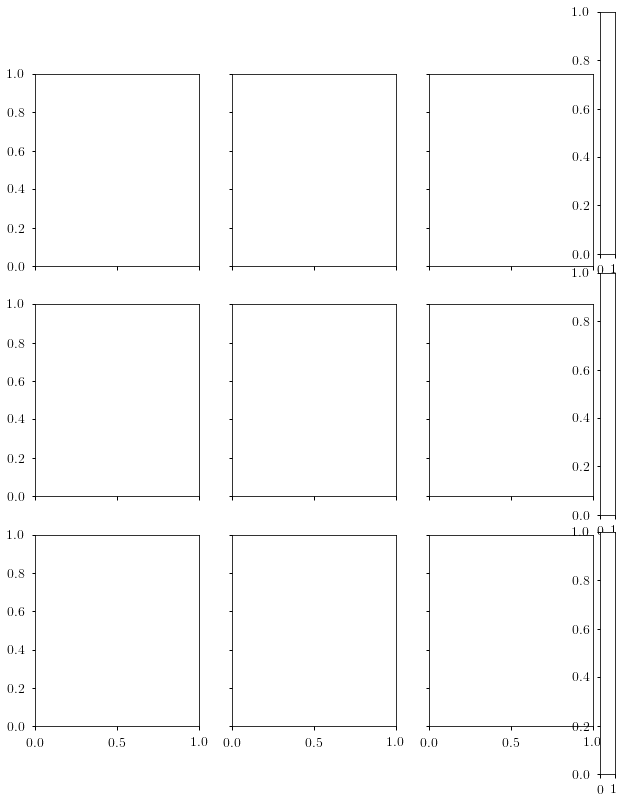

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,12), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax1 = fig.add_axes([.91, 0.672, .02, 0.28])
cbar_ax2 = fig.add_axes([.91, 0.37, .02, 0.28])
cbar_ax3 = fig.add_axes([.91, 0.07, .02, 0.28])
test = "MWP"
measure = "avgContrast"

for i, ndim in enumerate([2,3,5]):
    subdata = selectedData[(selectedData["testId"] == test) & (selectedData["nDim"] == ndim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]
    
    sns.heatmap(dd, vmin=0.5, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3,
                cbar=i == 0, cbar_ax=None if i else cbar_ax1)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'$d = %s$'%(ndim), y=1.04)
    if(i == 0): 
        ax.set_ylabel(r'avg')
    else:
        ax.set_ylabel("")
    
    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))

    ax.set_xlabel(r'')
    
measure = "stdContrast"  
for i, ndim in enumerate([2,3,5]):
    subdata = selectedData[(selectedData["testId"] == test) & (selectedData["nDim"] == ndim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i+3]
    sns.heatmap(dd, vmin=0, vmax=0.10, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3,
                cbar=i == 0, cbar_ax=None if i else cbar_ax2)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    if(i == 0): 
        ax.set_ylabel(r'std')
    else:
        ax.set_ylabel("")

    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
    ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
    ax.set_xlabel(r'')
    
measure = "powerAt95"  
for i, ndim in enumerate([2,3,5]):
    subdata = selectedData[(selectedData["testId"] == test) & (selectedData["nDim"] == ndim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])
    
    ax = axess[i+6]
    sns.heatmap(dd, vmin=0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3,
                cbar=i == 0, cbar_ax=None if i else cbar_ax3)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    if(i == 0): 
        ax.set_ylabel(r'power')
    else:
        ax.set_ylabel("")

    labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    ax.set_xticklabels(labels)

    ax.set_xlabel('$\sigma$')
    
plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig4_alphatest.pdf")

## Figure 7: Power against each dependency

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(11,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.058, .02, 0.88])

measure = "powerAt95"
nDim = 3

for i, dep in enumerate(sorted([x for x in selectedData["category"].unique() if x != "I"])):
    subdata = selectedData[(selectedData["category"] == dep) & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","testId"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "testId"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(testlist)
    dd = np.absolute(dd)

    ax = axess[i]
    
    sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, vmin=0, vmax=1,
                xticklabels=3,
                cbar=i == 0, cbar_ax=None if i else cbar_ax)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'%s'%(dep), y=1.02)
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig7_d3_alphatest.pdf")

<IPython.core.display.Javascript object>

/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [14]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(11,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.058, .02, 0.88])

measure = "powerAt95"
nDim = 5

for i, dep in enumerate(sorted([x for x in selectedData["category"].unique() if x != "I"])):
    subdata = selectedData[(selectedData["category"] == dep) & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","testId"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "testId"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(testlist)
    dd = np.absolute(dd)

    ax = axess[i]
    
    sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, vmin=0, vmax=1,
                xticklabels=3,
                cbar=i == 0, cbar_ax=None if i else cbar_ax)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'%s'%(dep), y=1.02)
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig7_d5_alphatest.pdf")

<IPython.core.display.Javascript object>

/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


## Figure 6: Distribution of dependency estimation scores, d=3

In [15]:
measure = "avgContrast"

fig, axes = plt.subplots(nrows=2, ncols= len(testlist), figsize=(23,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
nDim = 3


for i,testId in enumerate(testlist):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])
    
    ax = axess[i]
    
    dd = np.absolute(dd)
    
    if(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], 
                    ax=ax, vmax=1)
    elif(testId == "II"):
        dd = np.absolute(dd)
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    ax=ax,
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01, 0.01, 0.1,0,1,10,1e2]},
                    vmin=0.001)

        ax.scatter(3, 2.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 3.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 5.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 11.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 12.5, marker="+", s=50, color='black', alpha=0.7)
    elif(testId == "TC"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax, 
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01,0.01,0.1,0,1,10,1e2]},
                vmin = 0.001)
    elif(testId == "MS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], 
                    ax=ax, vmax=1, vmin=0)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), vmax=dd.max().max(), 
        xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'%s'%(testId))
    ax.set_ylabel("")
    
    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
    ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
    
    ax.set_xlabel("")
    if(i==0):
        ax.set_ylabel("avg")
    else:
        ax.set_ylabel("")

measure="stdContrast"
for i,testId in enumerate(testlist):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"])
    
    ax = axess[i+len(testlist)]
    
    dd = np.absolute(dd)
    
    if(testId == "CMI"): 
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.3f$'},
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    elif(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    elif(testId == "UDS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100),
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title("")
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
    if(i==0):
        ax.set_ylabel("std")
    else:
        ax.set_ylabel("")
    
plt.tight_layout()

fig.savefig("plots/Fig6_alphatest.pdf")

<IPython.core.display.Javascript object>

### Larger plots for Fig6

In [16]:
""""
measure = "avgContrast"

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
nDim = 3

testlist1 = ['MWP', 'TC', 'II', 'HiCS']

for i,testId in enumerate(testlist1):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]
    
    dd = np.absolute(dd)

    if(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, 
                    ax=ax, vmax=1)
    elif(testId == "II"):
        dd = np.absolute(dd)
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3,
                    ax=ax,
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01, 0.01, 0.1,0,1,10,1e2]},
                    vmin=0.001)
        ax.scatter(3, 2.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 3.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 5.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 11.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 12.5, marker="+", s=50, color='black', alpha=0.7)
    elif(testId == "TC"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, ax=ax, 
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01,0.01,0.1,0,1,10,1e2]},
                vmin = 0.001)
    elif(testId == "MS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, 
                    ax=ax, vmax=1, vmin=0)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), vmax=dd.max().max(), 
        xticklabels=3, ax=ax)
    

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'%s'%(testId))
    ax.set_ylabel("")
    
    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
    ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
    
    ax.set_xlabel("")
    if(i==0):
        ax.set_ylabel("avg")
    else:
        ax.set_ylabel("")

measure="stdContrast"
for i,testId in enumerate(testlist1):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])
    
    ax = axess[i+4]
    
    dd = np.absolute(dd)
    
    if(testId == "CMI"): 
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.3f$'},
                xticklabels=3, ax=ax)
    elif(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=3, ax=ax)
    elif(testId == "UDS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=3, ax=ax)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100),
                xticklabels=3, ax=ax)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title("")
    ax.set_ylabel("")
    
    labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    ax.set_xticklabels(labels)

    ax.set_xlabel(r'$\sigma$')
    
    if(i==0):
        ax.set_ylabel("std")
    else:
        ax.set_ylabel("")


plt.tight_layout()

fig.savefig("plots/Fig6_large_1.pdf")
"""

'"\nmeasure = "avgContrast"\n\nfig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8), sharey=True, sharex=True)\naxess = axes.reshape(-1)\nnDim = 3\n\ntestlist1 = [\'MWP\', \'TC\', \'II\', \'HiCS\']\n\nfor i,testId in enumerate(testlist1):\n    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]\n    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()\n    dd = d.set_index(["noise", "category"]).unstack("noise")\n    dd.columns = dd.columns.droplevel(0)\n    dd = dd.reindex([\'C\', "Dl", "H", "Hc", "HcG", \'Hs\', \'L\', \'P\', \'S1\', "S5", "St", "Zi", \'I\'])\n\n    ax = axess[i]\n    \n    dd = np.absolute(dd)\n\n    if(testId == "MWP"):\n        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), \n                    xticklabels=3, \n                    ax=ax, vmax=1)\n    elif(testId == "II"):\n        dd = np.absolute(dd)\n        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), \n                    xticklab

In [17]:
"""
measure = "avgContrast"

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
nDim = 3

testlist1 = ['MS', 'UDS', 'MAC', 'CMI']

for i,testId in enumerate(testlist1):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]
    
    dd = np.absolute(dd)
    
    if(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, 
                    ax=ax, vmax=1)
    elif(testId == "II"):

        dd = np.absolute(dd)
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3,
                    ax=ax,
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01, 0.01, 0.1,0,1,10,1e2]},
                    vmin=0.001)
        ax.scatter(3, 2.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 3.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 5.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 11.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 12.5, marker="+", s=50, color='black', alpha=0.7)
    elif(testId == "TC"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, ax=ax, 
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01,0.01,0.1,0,1,10,1e2]},
                vmin = 0.001)
    elif(testId == "MS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, 
                    ax=ax, vmax=1, vmin=0)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), vmax=dd.max().max(), 
        xticklabels=3, ax=ax)
    

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'%s'%(testId))
    ax.set_ylabel("")
    
    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
    ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
    
    ax.set_xlabel("")
    if(i==0):
        ax.set_ylabel("avg")
    else:
        ax.set_ylabel("")

measure="stdContrast"
for i,testId in enumerate(testlist1):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])
    
    ax = axess[i+4]
    
    dd = np.absolute(dd)

    if(testId == "CMI"): 
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.3f$'},
                xticklabels=3, ax=ax)
    elif(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=3, ax=ax)
    elif(testId == "UDS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=3, ax=ax)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100),
                xticklabels=3, ax=ax)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title("")
    ax.set_ylabel("")
    
    labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    ax.set_xticklabels(labels)
    ax.set_xlabel(r'$\sigma$')
    
    if(i==0):
        ax.set_ylabel("std")
    else:
        ax.set_ylabel("")

plt.tight_layout()

fig.savefig("plots/Fig6_large_2.pdf")
"""

'\nmeasure = "avgContrast"\n\nfig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8), sharey=True, sharex=True)\naxess = axes.reshape(-1)\nnDim = 3\n\ntestlist1 = [\'MS\', \'UDS\', \'MAC\', \'CMI\']\n\nfor i,testId in enumerate(testlist1):\n    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]\n    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()\n    dd = d.set_index(["noise", "category"]).unstack("noise")\n    dd.columns = dd.columns.droplevel(0)\n    dd = dd.reindex([\'C\', "Dl", "H", "Hc", "HcG", \'Hs\', \'L\', \'P\', \'S1\', "S5", "St", "Zi", \'I\'])\n\n    ax = axess[i]\n    \n    dd = np.absolute(dd)\n    \n    if(testId == "MWP"):\n        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), \n                    xticklabels=3, \n                    ax=ax, vmax=1)\n    elif(testId == "II"):\n\n        dd = np.absolute(dd)\n        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), \n                    xti